<center>
<h1> Malliavin Calculus </h1>
<h2> Project B </h1>
<h2> MMMEF </h2>
<h3> Youssef BULAHIA - Ouijdane ABCHIR </h3>

In this notebook, we will present our results of the numerical part of the project.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import display
np.random.seed(40)

### Question a)

In this section, we will compute the risky asset prices and the price of 2 types of asian options : a standard asian option with strike K1 and an asian option with two strikes K1 and K2, then we will show the associated results of each value of M.

We define the functions used to generate a Brownian Motion, and to calculate the asset prices, the payoff and the option price.

In [2]:
def asset_prices(r, sigma, T, M, N, x):
    B = np.zeros((N, M+1))
    B[:,1:] = np.cumsum(np.sqrt(T/(M+1))*np.random.normal(size=(N, M)), axis=1)
    e =(r-(sigma**2)/2)*(T/(M+1))*np.arange(0, M+1)+B*sigma
    return (x*np.exp(e), B)

def standard_payoff(spot_price, K1, K2):
    return (spot_price - K1)*(spot_price>K1)

def two_strikes_payoff(spot_price, K1, K2):
    return 1*(K1<spot_price) & (spot_price<K2)

def price_estimations(r, sigma, T, M, N, x, Nf, step, K1, K2, payoff_function):
    option_prices = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for i in range(N, Nf+1, step):
        prices = asset_prices(r, sigma, T, M, i, x)[0]
        asian_spot_price = (T/(M+1))*prices.sum(axis = 1)
        payoff = payoff_function(asian_spot_price, K1, K2)
        option_price = np.mean(np.exp(-r*T)*payoff)
        option_prices.append(option_price)
        emp_var = np.var(payoff, ddof = 1)/i
        emp_vars.append(emp_var)
        confidence_inters_lower.append(option_price - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(option_price + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Option_Price' : option_prices, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.arange(1000, 51001, 2000), inplace = True)
    df.index.name = 'N'
    return df

In the following, we will deal with the case of a standard asian option with strike K1.

First, we ara going to display a Dataframe table for each M with 4 columns : the option price, the empirical variance and the confidence interval for each N (simulations number). Then, we will plot the convergence of the estimators with a confidence interval at 99% for each value of M.

In [3]:
# Parameters
r = 0.03 # Risk free rate
sigma = 0.2
T = 1
N = 1000 # Number of simulations
x = 100
Nf = 51000 # Max number of simulations
step = 2000
K1 = 100
K2 = 110
M1 = 50
M2 = 150
M3 = 250


In the case of M = 50 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,5.471396,0.062518,4.981324,5.961468
3000,5.384115,0.021363,5.097641,5.670589
5000,5.319889,0.013042,5.096056,5.543721
7000,5.249453,0.009070,5.062788,5.436117
9000,5.053294,0.006456,4.895812,5.210776
11000,5.311684,0.005768,5.162832,5.460536
13000,5.346334,0.004958,5.208323,5.484345
15000,5.237013,0.004014,5.112836,5.361189
17000,5.324198,0.003702,5.204937,5.443458



In the case of M = 150 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,5.405212,0.061821,4.917880,5.892544
3000,5.492792,0.022155,5.201052,5.784532
5000,5.128468,0.012139,4.912517,5.344419
7000,5.198182,0.008812,5.014196,5.382168
9000,5.159824,0.006842,4.997705,5.321942
11000,5.278028,0.005595,5.131416,5.424640
13000,5.188076,0.004734,5.053223,5.322928
15000,5.190997,0.004099,5.065508,5.316487
17000,5.093908,0.003547,4.977183,5.210632



In the case of M = 250 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,5.334117,0.065455,4.832667,5.835567
3000,5.351472,0.021658,5.063023,5.639921
5000,5.359104,0.012960,5.135973,5.582235
7000,5.273554,0.008917,5.088476,5.458633
9000,5.371880,0.007143,5.206227,5.537532
11000,5.328369,0.005767,5.179528,5.477209
13000,5.336578,0.005009,5.197856,5.475299
15000,5.288204,0.004237,5.160624,5.415783
17000,5.309645,0.003713,5.190219,5.429071


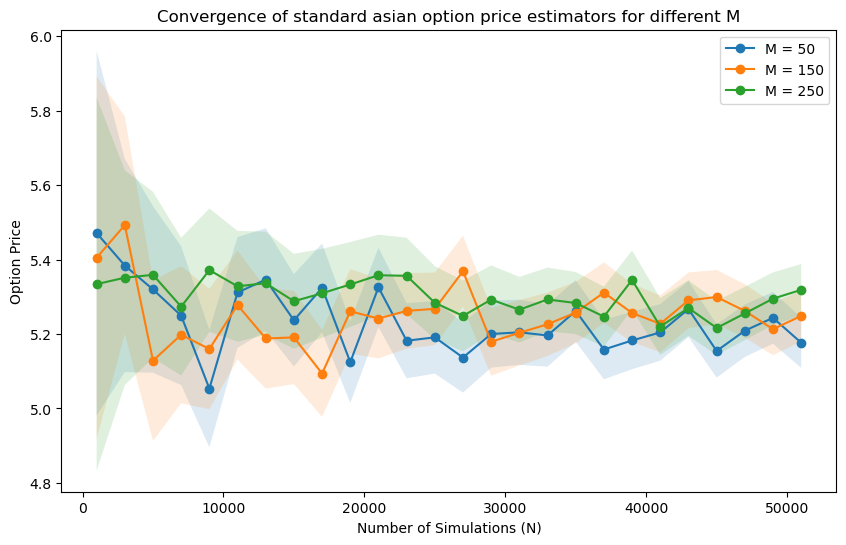

In [4]:
# Create the estimators for each M
results_M1 = price_estimations(r, sigma, T, M1, N, x, Nf, step, K1, K2, standard_payoff)
results_M2 = price_estimations(r, sigma, T, M2, N, x, Nf, step, K1, K2, standard_payoff)
results_M3 = price_estimations(r, sigma, T, M3, N, x, Nf, step, K1, K2, standard_payoff)
results = [results_M1, results_M2, results_M3]
# Display the results 
M = ['M = 50', 'M = 150', 'M = 250']
for i in range(3) :
    print('\nIn the case of', M[i], ':')
    display(results[i])
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Option_Price'], marker = 'o', label = M[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)   
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Convergence of standard asian option price estimators for different M")  
plt.legend()
plt.show()  

Now, we will deal with the case of an asian option with two strikes K1 and K2.


In the case of M = 50 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.303749,0.000215,0.274994,0.332505
3000,0.293722,0.000070,0.277279,0.310164
5000,0.297733,0.000043,0.284949,0.310517
7000,0.296540,0.000030,0.285748,0.307333
9000,0.292535,0.000023,0.283054,0.302017
11000,0.293604,0.000019,0.285019,0.302189
13000,0.291208,0.000016,0.283330,0.299087
15000,0.295080,0.000014,0.287718,0.302442
17000,0.292390,0.000012,0.285492,0.299287



In the case of M = 150 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.288222,0.000209,0.259887,0.316558
3000,0.276253,0.000068,0.260103,0.292404
5000,0.283758,0.000041,0.271149,0.296368
7000,0.282261,0.000029,0.271621,0.292901
9000,0.286928,0.000023,0.277500,0.296357
11000,0.289281,0.000019,0.280732,0.297830
13000,0.290014,0.000016,0.282145,0.297883
15000,0.289969,0.000014,0.282644,0.297295
17000,0.288622,0.000012,0.281750,0.295494



In the case of M = 250 :


,Option_Price,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.288222,0.000209,0.259887,0.316558
3000,0.287252,0.000069,0.270914,0.303590
5000,0.289387,0.000042,0.276705,0.302068
7000,0.296956,0.000030,0.286160,0.307753
9000,0.288654,0.000023,0.279209,0.298099
11000,0.295898,0.000019,0.287294,0.304501
13000,0.296284,0.000016,0.288367,0.304202
15000,0.293269,0.000014,0.285919,0.300618
17000,0.291019,0.000012,0.284131,0.297908


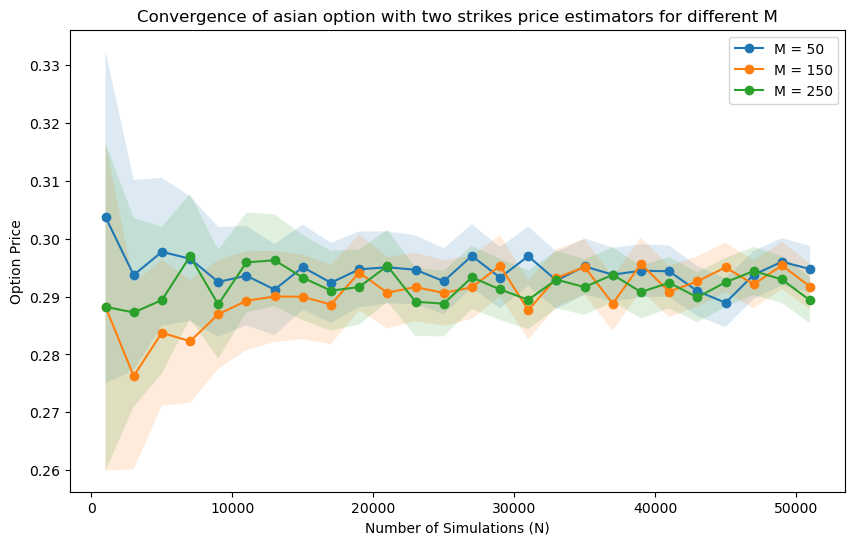

In [5]:
# Create the estimators for each M
results_M1 = price_estimations(r, sigma, T, M1, N, x, Nf, step, K1, K2, two_strikes_payoff)
results_M2 = price_estimations(r, sigma, T, M2, N, x, Nf, step, K1, K2, two_strikes_payoff)
results_M3 = price_estimations(r, sigma, T, M3, N, x, Nf, step, K1, K2, two_strikes_payoff)
results = [results_M1, results_M2, results_M3]
# Display the results 
for i in range(3) :
    print('\nIn the case of', M[i], ':')
    display(results[i])
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    results[i].set_index(np.arange(1000, 51001, 2000), inplace = True)
    plt.plot(results[i]['Option_Price'], marker = 'o', label = M[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)    
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Option Price")
plt.title("Convergence of asian option with two strikes price estimators for different M")  
plt.legend()
plt.show()

We observe for the two options that changing the values of M has no significant impact on either the empirical variances or the convergence of the estimators. Consequently, in the next question we will use the case M = 150 and N = 30 000.

### Question b)

In this section, we will compute the ∆(x) for the two options using the finite difference method, precise the empirical variance of each estimator and the corresponding confidence intervals, and at the same time, we will variate the value of ε to see its impact on our estimators.

We define the function delta_estimation of the finite difference method calculation. 

In [6]:
def delta_estimation(r, sigma, T, M, N, x, K1, K2, epsilons, payoff_function):
    deltas = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for epsilon in epsilons:       
        # Asset price path for (x - epsilon) and (x + epsilon)
        prices_minus = asset_prices(r, sigma, T, M, N, x - epsilon)[0]
        prices_plus = asset_prices(r, sigma, T, M, N, x + epsilon)[0]     
        spot_price_minus = (T/(M+1))*prices_minus.sum(axis = 1)
        spot_price_plus = (T/(M+1))*prices_plus.sum(axis = 1)     
        # Finite difference method calculation
        payoff_minus = payoff_function(spot_price_minus, K1, K2)
        payoff_plus = payoff_function(spot_price_plus, K1, K2)
        payoff_derivative = (payoff_plus - payoff_minus) / (2 * epsilon)    
        delta = np.mean(np.exp(-r*T)*payoff_derivative)
        deltas.append(delta)   
        emp_var = np.var(payoff_derivative, ddof = 1)/N
        emp_vars.append(emp_var)   
        confidence_inters_lower.append(delta - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(delta + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Delta' : deltas, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.array(epsilons), inplace=True)
    df.index.name = 'Epsilons'
    return df

The standard asian option with strike K1 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
Epsilons,,,,
0.01,2.853492,10.644115,-3.541070,9.248055
0.02,1.782448,2.633376,-1.398177,4.963073
0.03,-0.064706,1.156226,-2.172254,2.042842
0.04,-0.185028,0.647304,-1.761950,1.391895
0.05,0.967163,0.416628,-0.297953,2.232279
0.06,1.742386,0.289923,0.687033,2.797738
0.07,0.246612,0.210026,-0.651629,1.144853
0.08,0.847862,0.160936,0.061572,1.634152
0.09,0.179698,0.127075,-0.518995,0.878391


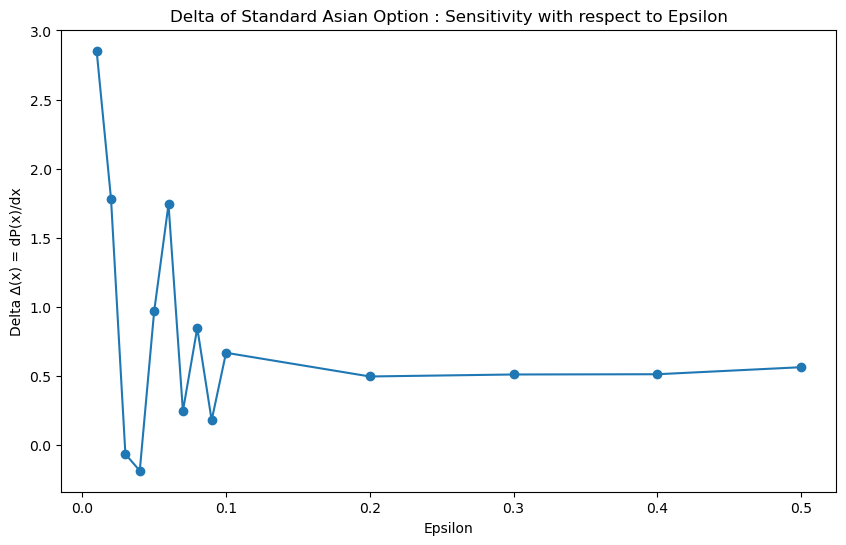

In [7]:
epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
results = delta_estimation(r, sigma, T, M2, 30000, x, K1, K2, epsilons, standard_payoff) # M = 150, N = 30000
display(results)
# Plot the sensitivity with respect to epsilon
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Delta'], marker = 'o', label = 'M = 150, N = 30000')
plt.xlabel("Epsilon")
plt.ylabel("Delta ∆(x) = dP(x)/dx")
plt.title("Delta of Standard Asian Option : Sensitivity with respect to Epsilon")
plt.show()

The asian option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
Epsilons,,,,
0.01,0.127775,0.035042,-0.239128,0.494679
0.02,0.033157,0.008730,-0.149976,0.216290
0.03,-0.079253,0.003892,-0.201523,0.043017
0.04,-0.012131,0.002208,-0.104224,0.079962
0.05,-0.078606,0.001401,-0.151982,-0.005230
0.06,-0.004583,0.000979,-0.065913,0.056748
0.07,0.013170,0.000716,-0.039290,0.065631
0.08,-0.001213,0.000544,-0.046907,0.044481
0.09,-0.000899,0.000432,-0.041643,0.039846


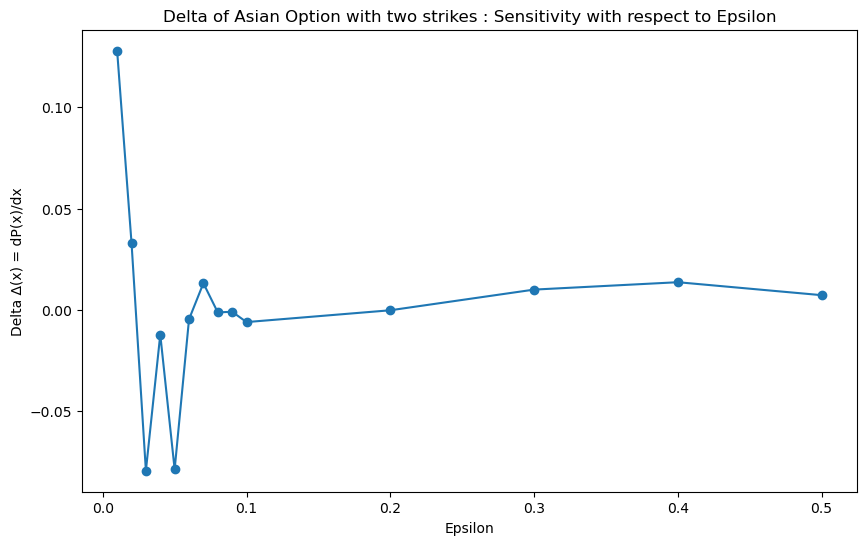

In [8]:
results = delta_estimation(r, sigma, T, M2, 30000, x, K1, K2, epsilons, two_strikes_payoff)
display(results)
# Plot of the sensitivity with respect to epsilon
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Delta'], marker = 'o', label = 'M = 150, N = 30000')
plt.xlabel("Epsilon")
plt.ylabel("Delta ∆(x) = dP(x)/dx")
plt.title("Delta of Asian Option with two strikes : Sensitivity with respect to Epsilon")
plt.show()

The variation of epsilon has no significant impact neither on the delta value or on the empirical variance for the two options.

### Question c)

In this section, we will implement 2 methods.

We start by the Part B first result of the project :
<center>$\Delta(x) = \frac{e^{-rT}}{x} \mathbb{E}[\Phi(\int_{0}^{T}X_{s}^{x}\mathrm{d}s)\Pi_1]$ </center>
Where :
<center>$\Pi_1 = \frac{\int_{0}^{T}X_{s}^{x}\mathrm{d}s}{\int_{0}^{T}sX_{s}^{x}\mathrm{d}s} [\frac{B_T}{\sigma} + \frac{\int_{0}^{T}s^2X_{s}^{x}\mathrm{d}s}{x\int_{0}^{T}sX_{s}^{x}\mathrm{d}s}]$</center>
$\Phi$ is the payoff function.

We start by defining the delta calculation function based on $\Pi_1$with different number of simulations.

In [9]:
def delta_estimation_Pi_1(r, sigma, T, M, N, x, Nf, step, K1, K2, payoff_function):
    deltas = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for i in range(N, Nf+1, step):
        prices = asset_prices(r, sigma, T, M, i, x)[0]
        B = asset_prices(r, sigma, T, M, i, x)[1]
        spot_price = (T/(M+1))*prices.sum(axis = 1)
        # Pi_1 computation
        integral_1 = (T/(M+1))*np.arange(0, M+1).dot(prices.T)
        integral_2 = (T/(M+1))*np.square(np.arange(0, M+1)).dot(prices.T)
        Pi_1 = (spot_price/integral_1) * ((B[:, -1]/sigma)+(integral_2/(x*integral_1)))
        # Payoff calculation
        payoff = payoff_function(spot_price, K1, K2)
        delta_payoff = np.exp(-r*T) * payoff * Pi_1/x
        delta = np.mean(delta_payoff)
        deltas.append(delta)
        emp_var = np.var(delta_payoff, ddof = 1)/N
        emp_vars.append(emp_var)
        confidence_inters_lower.append(delta - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(delta + np.sqrt(emp_var)*1.96)
    df = pd.DataFrame({'Delta' : deltas, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.arange(1000, 51001, 2000), inplace = True)
    df.index.name = 'N'
    return df

The standard asian option with strike K1 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.000746,4.532030e-08,0.000328,0.001163
3000,0.000621,3.269384e-08,0.000266,0.000975
5000,0.000858,3.565294e-08,0.000488,0.001228
7000,0.000609,3.784245e-08,0.000228,0.000990
9000,0.000782,3.692991e-08,0.000405,0.001159
11000,0.000735,3.667134e-08,0.000360,0.001111
13000,0.000714,3.632226e-08,0.000341,0.001088
15000,0.000635,3.631451e-08,0.000261,0.001008
17000,0.000753,3.563862e-08,0.000383,0.001123


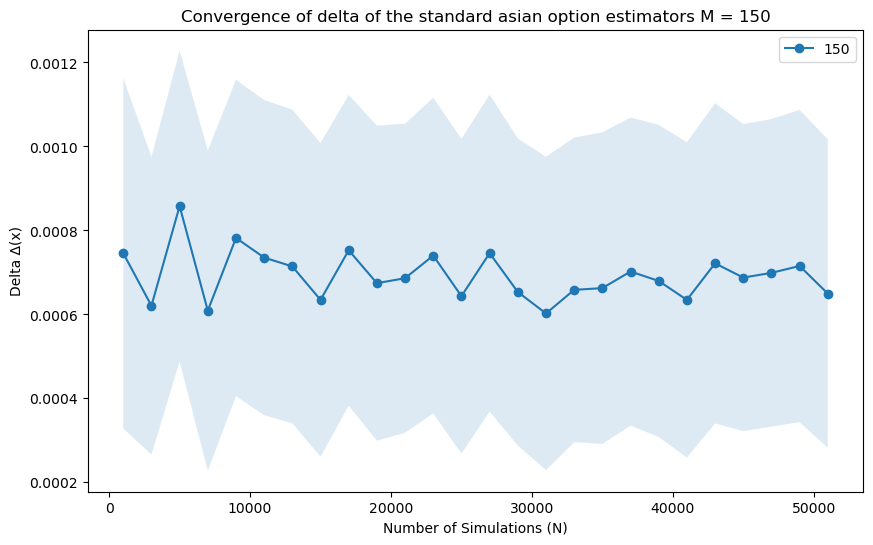

In [10]:
results_Pi_1_std = delta_estimation_Pi_1(r, sigma, T, M2, N, x, Nf, step, K1, K2, standard_payoff)
# Display the results 
display(results_Pi_1_std)
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_1_std['Delta'], marker = 'o', label = M2)
plt.fill_between(results_Pi_1_std.index, results_Pi_1_std['Lower Confidence Interval'],results_Pi_1_std['Upper Confidence Interval'], alpha = 0.15)
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of the standard asian option estimators M = 150")  
plt.legend()
plt.show()  

For the asian option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.000040,1.213597e-10,0.000019,0.000062
3000,0.000037,1.339359e-10,0.000015,0.000060
5000,0.000046,1.339382e-10,0.000023,0.000068
7000,0.000037,1.212357e-10,0.000015,0.000058
9000,0.000035,1.247553e-10,0.000014,0.000057
11000,0.000037,1.225676e-10,0.000016,0.000059
13000,0.000039,1.242768e-10,0.000017,0.000061
15000,0.000045,1.255775e-10,0.000023,0.000067
17000,0.000041,1.267372e-10,0.000019,0.000063


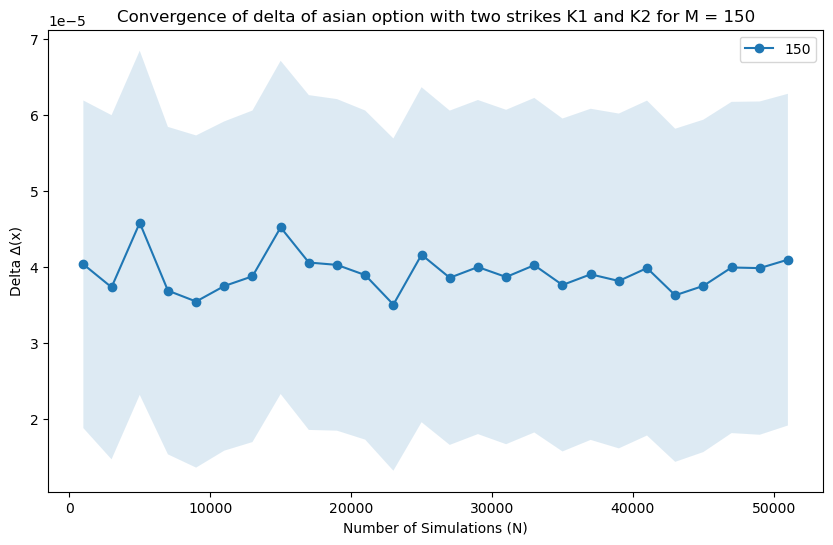

In [11]:
results_Pi_1_two_strikes = delta_estimation_Pi_1(r, sigma, T, M2, N, x, Nf, step, K1, K2, two_strikes_payoff)
# Display the results 
display(results_Pi_1_two_strikes)
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_1_two_strikes['Delta'], marker = 'o', label = M2)
plt.fill_between(results_Pi_1_two_strikes.index, results_Pi_1_two_strikes['Lower Confidence Interval'],results_Pi_1_two_strikes['Upper Confidence Interval'], alpha = 0.15) 
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of asian option with two strikes K1 and K2 for M = 150")  
plt.legend()
plt.show()  

We will use the second method deduced from Part B :
<center>$\Delta(x) = \frac{e^{-rT}}{x} \mathbb{E}[\Phi(\int_{0}^{T}X_{s}^{x}\mathrm{d}s)\Pi_2]$</center>
Where :
<center>$\Pi_2 = \frac{2}{\sigma}[ \frac{X_{T}^{x} - x}{\int_{0}^{T}X_{s}^{x}\mathrm{d}s} - r] + 1$</center>
$\Phi$ is the payoff function.

We start by defining the delta calculation function based on $\Pi_1$with different number of simulations.

In [14]:
def delta_estimation_Pi_2(r, sigma, T, M, N, x, Nf, step, K1, K2, payoff_function):
    deltas = []
    emp_vars = []
    confidence_inters_lower = []
    confidence_inters_upper = []
    for i in range(N, Nf+1, step):
        prices = asset_prices(r, sigma, T, M, i, x)[0]
        B = asset_prices(r, sigma, T, M, i, x)[1]
        spot_price = (T/(M+1))*prices.sum(axis = 1)
        # Pi_1 computation
        integral_1 = (T/(M+1))*np.arange(0, M+1).dot(prices.T)
        integral_2 = (T/(M+1))*np.square(np.arange(0, M+1)).dot(prices.T)
        Pi_2 = (2/sigma) * (( (prices[:, -1]-x) /spot_price) - r)
        # Calculation of the payoff
        payoff = payoff_function(spot_price, K1, K2)
        delta_payoff = np.exp(-r*T) * payoff * Pi_2/x
        delta = np.mean(delta_payoff)
        deltas.append(delta)
        emp_var = np.var(delta_payoff, ddof = 1)/N
        emp_vars.append(emp_var)
        confidence_inters_lower.append(delta - np.sqrt(emp_var)*1.96)
        confidence_inters_upper.append(delta + np.sqrt(emp_var)*1.96)  
    df = pd.DataFrame({'Delta' : deltas, 'Empirical Var' : emp_vars, 'Lower Confidence Interval' : confidence_inters_lower, 'Upper Confidence Interval' : confidence_inters_upper})
    df.set_index(np.arange(1000, 51001, 2000), inplace = True)
    df.index.name = 'N'
    return df

The standard asian option with strike K1 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.115319,0.000102,0.095563,0.135076
3000,0.105838,0.000068,0.089686,0.121990
5000,0.106784,0.000072,0.090161,0.123408
7000,0.102082,0.000068,0.085906,0.118258
9000,0.104870,0.000072,0.088285,0.121454
11000,0.098373,0.000065,0.082623,0.114123
13000,0.098772,0.000064,0.083117,0.114428
15000,0.100970,0.000064,0.085304,0.116635
17000,0.102485,0.000069,0.086236,0.118733


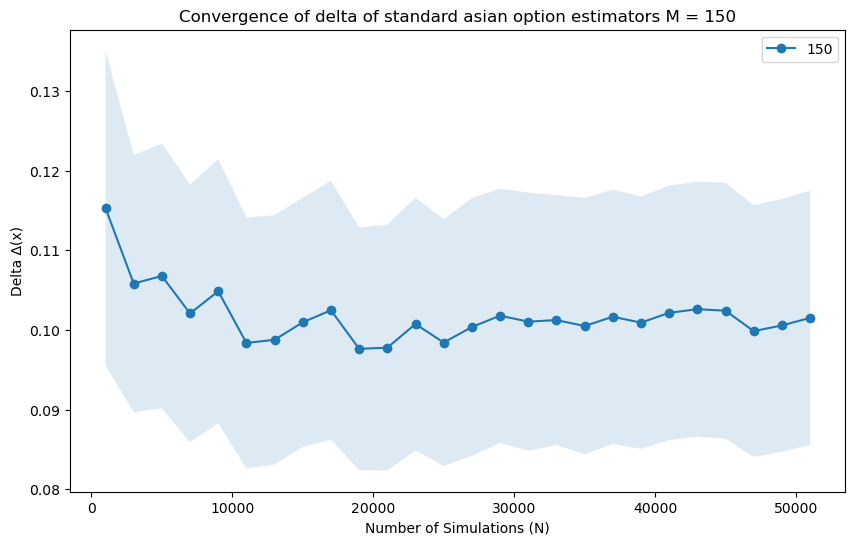

In [15]:
results_Pi_2_std = delta_estimation_Pi_2(r, sigma, T, M2, N, x, Nf, step, K1, K2, standard_payoff)
# Display the results 
display(results_Pi_2_std)
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_2_std ['Delta'], marker = 'o', label = M2)
plt.fill_between(results_Pi_2_std .index, results_Pi_2_std ['Lower Confidence Interval'],results_Pi_2_std ['Upper Confidence Interval'], alpha = 0.15) 
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of standard asian option estimators M = 150")  
plt.legend()
plt.show()  

The asian option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,0.000938,3.420873e-08,0.000576,0.001301
3000,0.001103,3.778238e-08,0.000722,0.001484
5000,0.001035,3.602469e-08,0.000663,0.001407
7000,0.001066,3.715537e-08,0.000688,0.001443
9000,0.001123,3.710622e-08,0.000746,0.001501
11000,0.001221,3.706157e-08,0.000844,0.001599
13000,0.001130,3.660008e-08,0.000755,0.001505
15000,0.001102,3.527466e-08,0.000734,0.001470
17000,0.001230,3.805552e-08,0.000848,0.001613


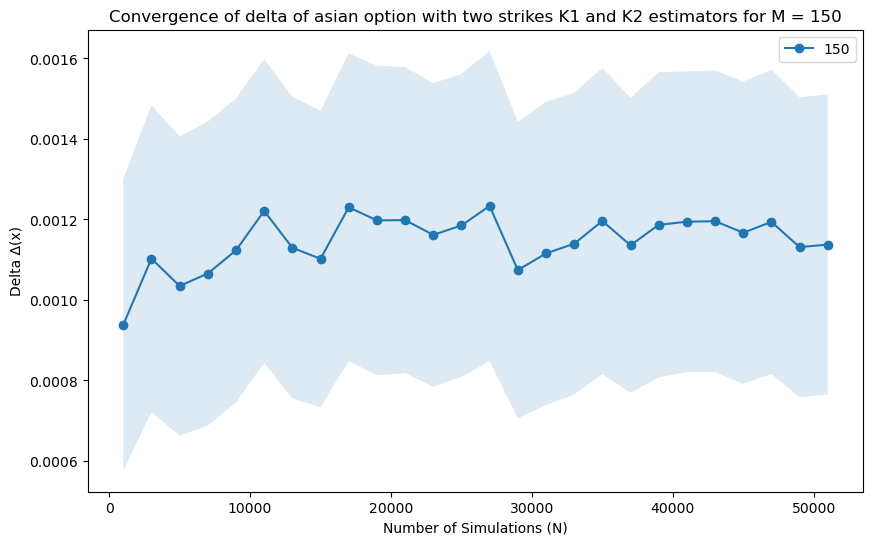

In [16]:
results_Pi_2_two_strikes = delta_estimation_Pi_2(r, sigma, T, M2, N, x, Nf, step, K1, K2, two_strikes_payoff)
# Display the results 
display(results_Pi_2_two_strikes)
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
plt.plot(results_Pi_2_two_strikes['Delta'], marker = 'o', label = M2)
plt.fill_between(results_Pi_2_two_strikes.index, results_Pi_2_two_strikes['Lower Confidence Interval'],results_Pi_2_two_strikes['Upper Confidence Interval'], alpha = 0.15)   
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of delta of asian option with two strikes K1 and K2 estimators for M = 150")  
plt.legend()
plt.show()  

### Question d)

In this part, we will compare the previous three methods for different simulations : Finite difference method with epsilon fixed on 0.01, $\Pi_1$ method and $\Pi_2$ method. Then, we will compare them  graphically and in terms of empirical variance.

For the standard asian option :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,33.293804,318.070170,-1.661859,68.249467
3000,5.635775,107.000292,-14.638651,25.910200
5000,-11.829406,62.433809,-27.316360,3.657547
7000,8.064282,45.112612,-5.100239,21.228802
9000,13.618838,35.935978,1.869300,25.368377
11000,-0.817801,28.499025,-11.281159,9.645557
13000,1.541947,24.699877,-8.199051,11.282946
15000,-3.217484,20.836785,-12.164361,5.729392
17000,6.698624,17.999234,-1.616775,15.014023


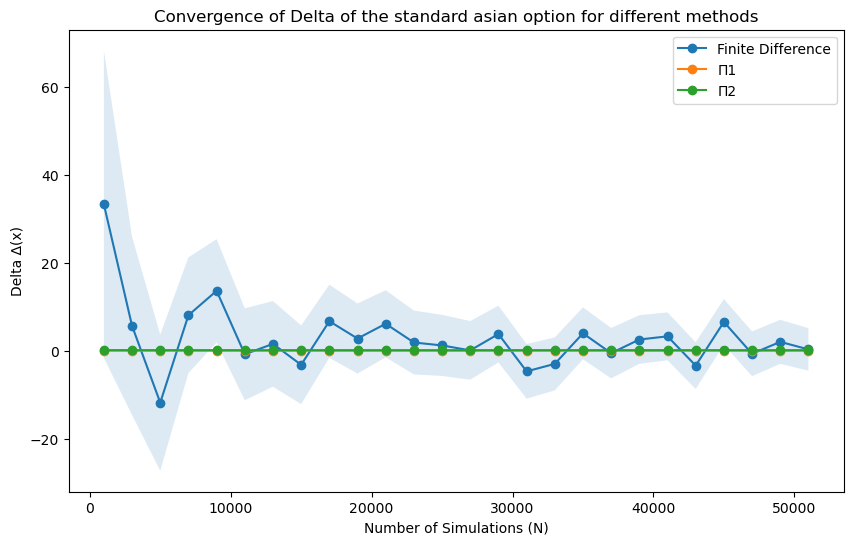

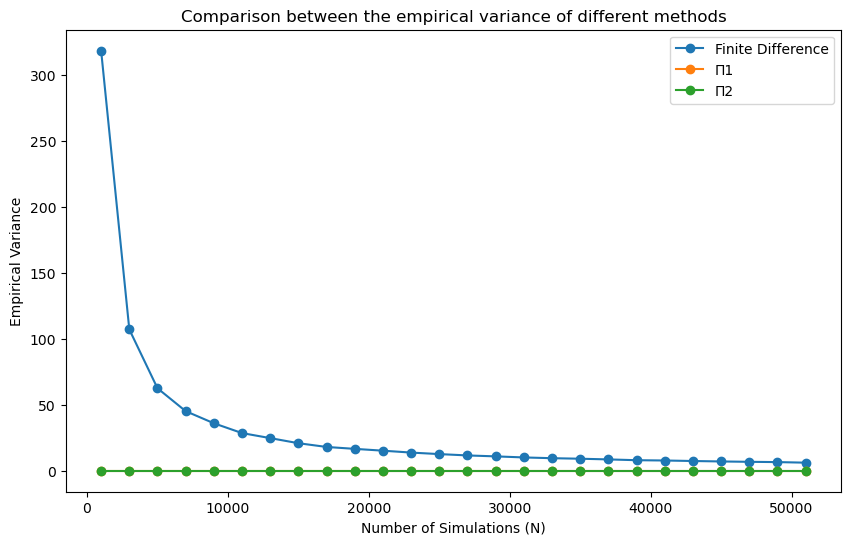

In [17]:
results_FD_std = pd.DataFrame()
for i in range(N, Nf+1, step):
    results_FD_std = pd.concat([results_FD_std, delta_estimation(r, sigma, T, M2, i, x, K1, K2, epsilons[:2], standard_payoff).iloc[:1,:]])
results_FD_std.set_index(np.arange(N, Nf+1, step), inplace = True)
results_FD_std.index.name = 'N'
display(results_FD_std)
results = [results_FD_std, results_Pi_1_std, results_Pi_2_std]
Method = ['Finite Difference', 'Π1', 'Π2']
# Plot and compare the results for the standard payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Delta'], marker = 'o', label = Method[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)   
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of Delta of the standard asian option for different methods")  
plt.legend()
plt.show()  
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Empirical Var'], marker = 'o', label = Method[i])   
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Empirical Variance")
plt.title("Comparison between the empirical variance of different methods")  
plt.legend()
plt.show()  

We can conclude from the graphs that all the three methods have a good estimation of Delta. The methods deduced from part B of the project are better since they have a good performance for almost all the values of N, while the efficiency of the finite difference method depends on the value of N.

The asian option with two strikes K1 and K2 :

,Delta,Empirical Var,Lower Confidence Interval,Upper Confidence Interval
N,,,,
1000,-18.075785,297.248824,-51.867960,15.716390
3000,-17.786511,106.300601,-37.994539,2.421517
5000,7.387323,63.126218,-8.185271,22.959917
7000,10.742278,44.881676,-2.388505,23.873060
9000,0.758255,34.840226,-10.810765,12.327274
11000,0.490970,27.379300,-9.764776,10.746715
13000,-3.158745,24.733817,-12.906434,6.588943
15000,-10.016845,20.627723,-18.918725,-1.114966
17000,-7.827638,18.105073,-16.167449,0.512173


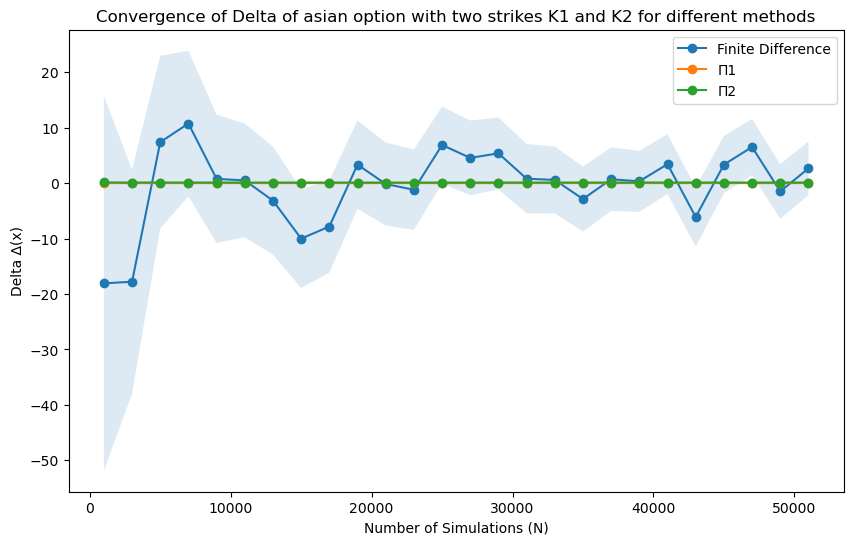

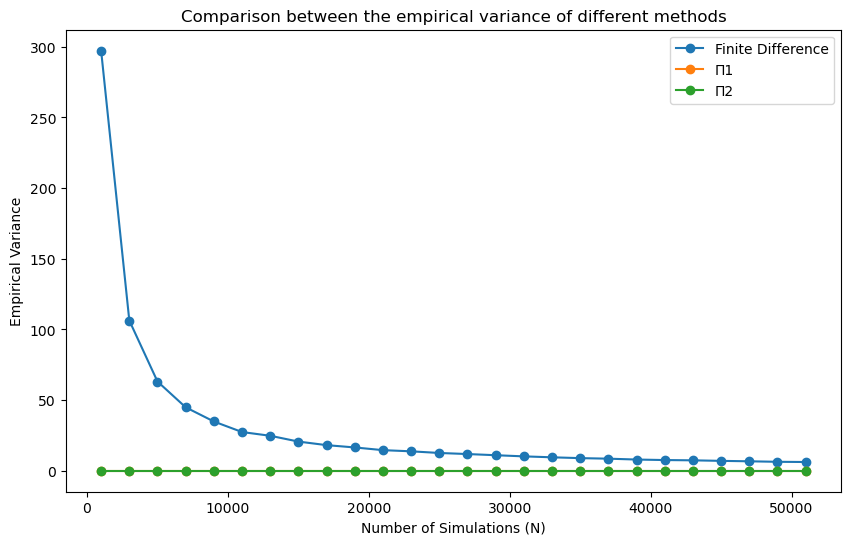

In [18]:
results_FD_two_strikes = pd.DataFrame()
for i in range(N, Nf+1, step):
    results_FD_two_strikes = pd.concat([results_FD_two_strikes, delta_estimation(r, sigma, T, M2, i, x, K1, K2, epsilons[:2], standard_payoff).iloc[:1,:]])
results_FD_two_strikes.set_index(np.arange(N, Nf+1, step), inplace = True)
results_FD_two_strikes.index.name = 'N'
display(results_FD_two_strikes)
results = [results_FD_two_strikes, results_Pi_1_std, results_Pi_2_std]
Method = ['Finite Difference', 'Π1', 'Π2']
# Plot and compare the results for the two strikes payoff
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Delta'], marker = 'o', label = Method[i])
    plt.fill_between(results[i].index, results[i]['Lower Confidence Interval'],results[i]['Upper Confidence Interval'], alpha = 0.15)   
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Delta ∆(x)")
plt.title("Convergence of Delta of asian option with two strikes K1 and K2 for different methods")  
plt.legend()
plt.show()
plt.figure(figsize = (10, 6))
for i in range(3):
    plt.plot(results[i]['Empirical Var'], marker = 'o', label = Method[i])   
plt.xlabel("Number of Simulations (N)")
plt.ylabel("Empirical Variance")
plt.title("Comparison between the empirical variance of different methods")  
plt.legend()
plt.show()  

Same conclusion as before.

### Question e)

Conclusion : we can observe that the efficiency of the finite difference method depends on the values of N, but the mathematical results from part B variate less with respect to the value of N so they are generally more performant.